## Dataset Information :
<ul style= "color:#137667;
            font-size:12px;">
    <li> age : age of the patient</li>
    <li> sex : sex of the patient (0 - Male, 1 - Female)</li>
    <li> cp : Chest Pain type</li>
    0: typical angina <br>
    1: atypical angina <br>
    2: non-anginal pain <br>
    3: asymptomatic <br>
    <li> trtbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> rest_ecg : resting electrocardiographic results</li>
  0:normal <br>
  1:having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV) <br>
  2:showing probable or definite left ventricular hypertrophy by Estes' criteria
    <li> thalachh : maximum heart rate achieved</li>
    <li> exng : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : ST/HR Slope </li>
    <li> caa : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> output : 0= less chance of heart attack 1= more chance of heart attack</li>
</ul>

In [1]:
# Run this code cell for initial setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# load the data to colab
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148.0,0.0,0.4,1,0,1,1
6,56,0,1,140,294.0,0,0,153.0,0.0,1.3,1,0,2,1
7,44,1,1,120,263.0,0,1,173.0,0.0,0.0,2,0,3,1
8,52,1,2,172,199.0,1,1,162.0,0.0,0.5,2,0,3,1
9,57,1,2,150,168.0,0,1,174.0,0.0,1.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      321 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  320 non-null    float64
 8   exng      321 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


---
---
**1. Checking the presence of duplicate values and dealing with them.**

In [5]:
# write your code here
num_duplicates = data.duplicated().sum()
print(f'There are {num_duplicates} duplicate rows in the dataset.')

data = data.drop_duplicates().reset_index(drop=True)
print(f'Dataset shape after removing duplicates: {data.shape}')

There are 22 duplicate rows in the dataset.
Dataset shape after removing duplicates: (302, 14)


---
---
**2.Checking the presence of missing values and dealing with them.**

In [ ]:
# chol column (continuous numerical)
# thalachh (continuous numerical)
# exng (categorical)
print('Missing values before imputation:')
print(data.isnull().sum())

# Impute missing values
# 'chol' (continuous numerical) – fill with median
if data['chol'].isnull().sum() > 0:
    data['chol'].fillna(data['chol'].median(), inplace=True)
# 'thalachh' (continuous numerical) – fill with median
if data['thalachh'].isnull().sum() > 0:
    data['thalachh'].fillna(data['thalachh'].median(), inplace=True)
# 'exng' (categorical) – fill with mode
if data['exng'].isnull().sum() > 0:
    data['exng'].fillna(data['exng'].mode()[0], inplace=True)

print('Missing values after imputation:')
print(data.isnull().sum())

Missing values before imputation:
age         0
sex         0
cp          0
trtbps      0
chol        3
fbs         0
restecg     0
thalachh    4
exng        3
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64
Missing values after imputation:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


---
---
**3.Determining mean, standard deviation and quartiles(q1,q2,q3) for following columns:**
   - age
   - trtbps
   - chol
   - thalachh

In [ ]:
cols = ['age', 'trtbps', 'chol', 'thalachh']
stats_df = pd.DataFrame(index=['mean','std','q1','median','q3'], columns=cols)
for col in cols:
    stats_df.at['mean', col] = data[col].mean()
    stats_df.at['std', col] = data[col].std()
    stats_df.at['q1', col] = data[col].quantile(0.25)
    stats_df.at['median', col] = data[col].median()
    stats_df.at['q3', col] = data[col].quantile(0.75)

stats_df

,age,trtbps,chol,thalachh
mean,54.42053,131.602649,246.281457,149.592715
std,9.04797,17.563394,50.566527,22.748437
q1,48.0,120.0,212.0,134.5
median,55.5,130.0,241.0,153.0
q3,61.0,140.0,274.0,165.75


---
---
**4.Analysing whether males or females are at a higher risk of heart attack.**

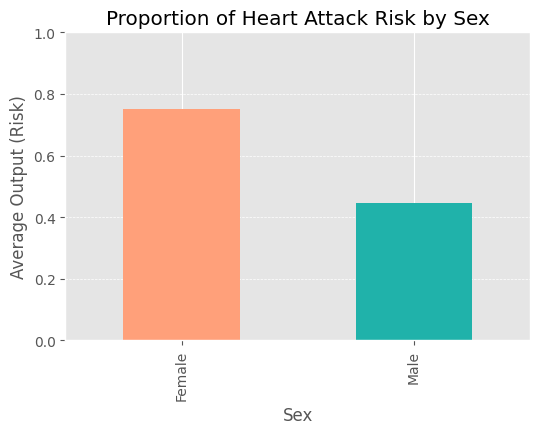

,output
sex_label,
Female,0.750000
Male,0.446602


In [ ]:
# Map sex labels (0 = Female, 1 = Male)
data['sex_label'] = data['sex'].map({0:'Female', 1:'Male'})
risk_by_sex = data.groupby('sex_label')['output'].mean()

# Bar plot for risk by sex
plt.figure(figsize=(6,4))
risk_by_sex.plot(kind='bar', color=['#FFA07A','#20B2AA'])
plt.title('Proportion of Heart Attack Risk by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Output (Risk)')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

risk_by_sex

**5.Patients with which type of chest pain are at highest risk of heart attack.**

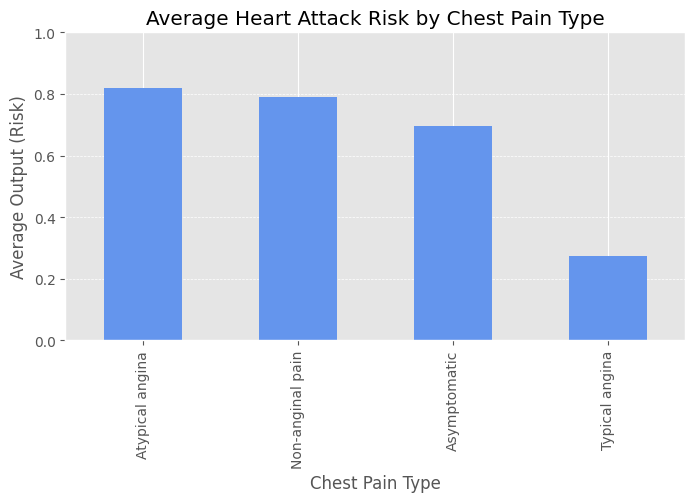

,output
cp_label,
Atypical angina,0.820000
Non-anginal pain,0.790698
Asymptomatic,0.695652
Typical angina,0.272727


In [ ]:
cp_map = {0:'Typical angina', 1:'Atypical angina', 2:'Non-anginal pain', 3:'Asymptomatic'}
data['cp_label'] = data['cp'].map(cp_map)

risk_by_cp = data.groupby('cp_label')['output'].mean().sort_values(ascending=False)

# Plot risk by chest pain type
plt.figure(figsize=(8,4))
risk_by_cp.plot(kind='bar', color='#6495ED')
plt.title('Average Heart Attack Risk by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Output (Risk)')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

risk_by_cp

---
---
**6.Analying the effect of age on heart attack risk.**

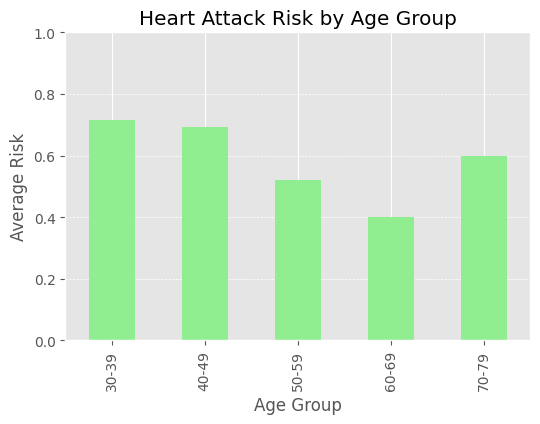

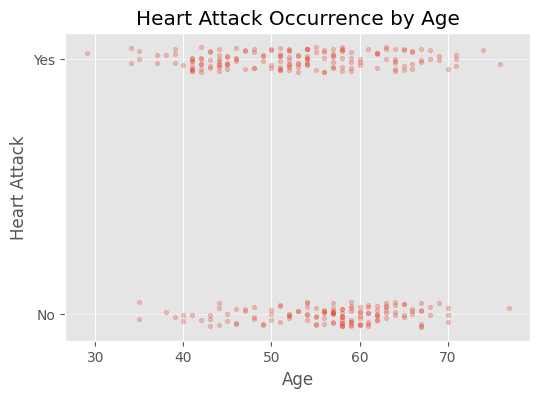

In [10]:
# Create age bins
bins = [29, 39, 49, 59, 69, 79]
labels = ['30-39','40-49','50-59','60-69','70-79']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

risk_by_age_group = data.groupby('age_group')['output'].mean()

# Bar plot for age groups
plt.figure(figsize=(6,4))
risk_by_age_group.plot(kind='bar', color='#90EE90')
plt.title('Heart Attack Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Risk')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

# Scatter plot: age vs outcome
plt.figure(figsize=(6,4))
# Add jitter to y-axis for visualization
jitter = (np.random.rand(len(data)) - 0.5) * 0.1
plt.scatter(data['age'], data['output'] + jitter, alpha=0.3, s=10)
plt.yticks([0,1], ['No','Yes'])
plt.xlabel('Age')
plt.ylabel('Heart Attack')
plt.title('Heart Attack Occurrence by Age')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

---
---
**7.A higher risk of heart attack is associated more with low fasting blood sugar levels or high fasting blood sugar levels.**

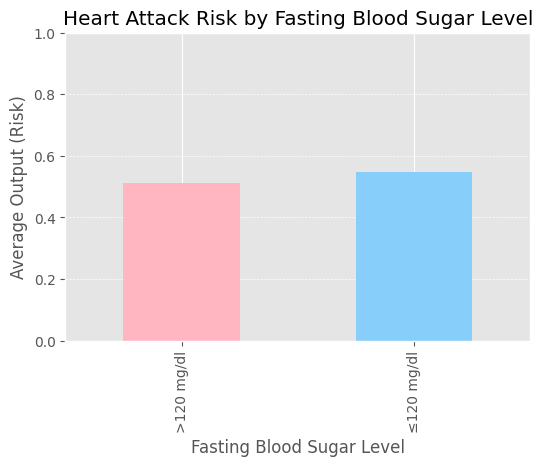

,output
fbs_label,
>120 mg/dl,0.511111
≤120 mg/dl,0.548638


In [ ]:
# Map fasting blood sugar labels
fbs_map = {0:'≤120 mg/dl', 1:'>120 mg/dl'}
data['fbs_label'] = data['fbs'].map(fbs_map)

risk_by_fbs = data.groupby('fbs_label')['output'].mean()

plt.figure(figsize=(6,4))
risk_by_fbs.plot(kind='bar', color=['#FFB6C1', '#87CEFA'])
plt.title('Heart Attack Risk by Fasting Blood Sugar Level')
plt.xlabel('Fasting Blood Sugar Level')
plt.ylabel('Average Output (Risk)')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

risk_by_fbs

---
---
**8.How the risk of heart atack can be determined from resting electrocardiographic results?**

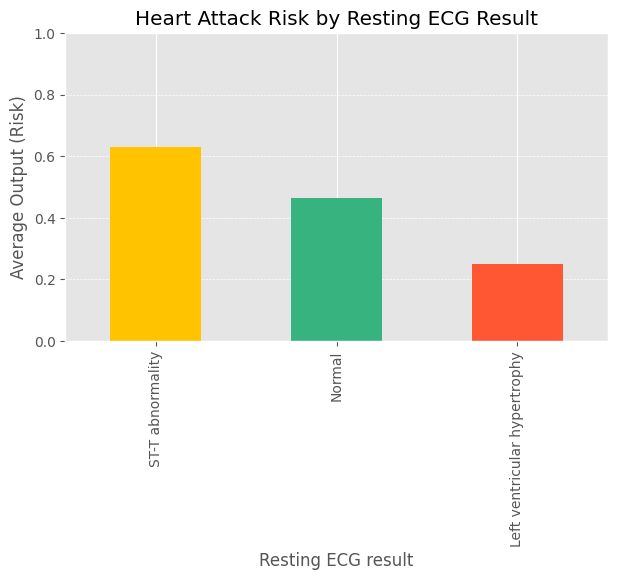

,output
restecg_label,
ST-T abnormality,0.629139
Normal,0.462585
Left ventricular hypertrophy,0.250000


In [ ]:
# Map resting ECG labels
restecg_map = {0:'Normal', 1:'ST-T abnormality', 2:'Left ventricular hypertrophy'}
data['restecg_label'] = data['restecg'].map(restecg_map)

risk_by_restecg = data.groupby('restecg_label')['output'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
risk_by_restecg.plot(kind='bar', color=['#FFC300','#36B37E','#FF5733'])
plt.title('Heart Attack Risk by Resting ECG Result')
plt.xlabel('Resting ECG result')
plt.ylabel('Average Output (Risk)')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

risk_by_restecg

---
---
**9. Is resting blood presure a significant factor for detrmining risk of a heart attack?**

Mean resting blood pressure (Heart Attack = 1): 129.25
Mean resting blood pressure (Heart Attack = 0): 134.3985507246377
T-test statistic: -2.529, p-value: 0.01199


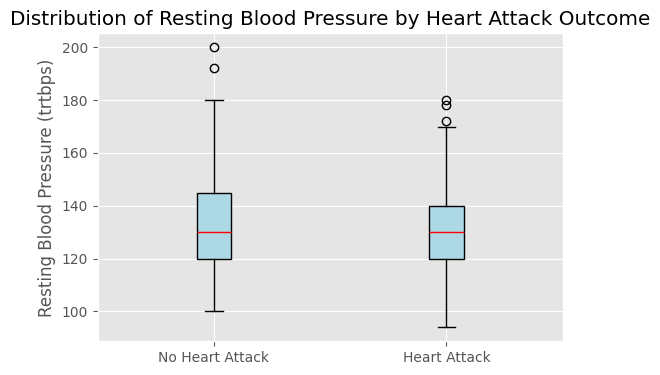

In [ ]:
from scipy.stats import ttest_ind

bp_yes = data[data['output']==1]['trtbps']
bp_no = data[data['output']==0]['trtbps']

print('Mean resting blood pressure (Heart Attack = 1):', bp_yes.mean())
print('Mean resting blood pressure (Heart Attack = 0):', bp_no.mean())

# Statistical test
stat, p = ttest_ind(bp_yes, bp_no, equal_var=False)
print(f'T-test statistic: {stat:.3f}, p-value: {p:.5f}')

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([bp_no, bp_yes], labels=['No Heart Attack','Heart Attack'], patch_artist=True,
            boxprops=dict(facecolor='#ADD8E6'), medianprops=dict(color='red'))
plt.title('Distribution of Resting Blood Pressure by Heart Attack Outcome')
plt.ylabel('Resting Blood Pressure (trtbps)')
plt.show()

---
---
**10.Is heart attack risk asociated with a higher heart rate?**

Mean maximum heart rate (Heart Attack = 1): 158.42073170731706
Mean maximum heart rate (Heart Attack = 0): 139.1014492753623
T-test statistic: 7.978, p-value: 0.00000


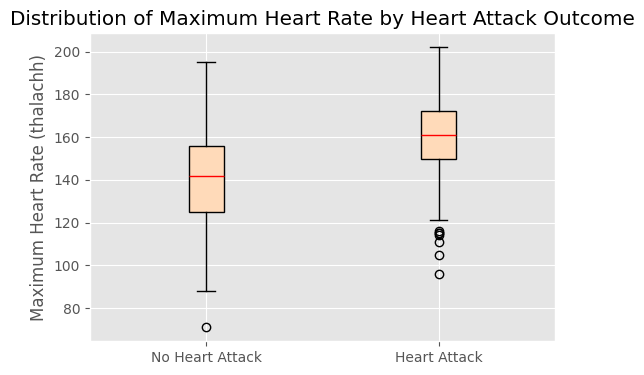

In [16]:
from scipy.stats import ttest_ind

hr_yes = data[data['output']==1]['thalachh']
hr_no = data[data['output']==0]['thalachh']

print('Mean maximum heart rate (Heart Attack = 1):', hr_yes.mean())
print('Mean maximum heart rate (Heart Attack = 0):', hr_no.mean())

stat, p = ttest_ind(hr_yes, hr_no, equal_var=False)
print(f'T-test statistic: {stat:.3f}, p-value: {p:.5f}')

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([hr_no, hr_yes], labels=['No Heart Attack','Heart Attack'], patch_artist=True,
            boxprops=dict(facecolor='#FFDAB9'), medianprops=dict(color='red'))
plt.title('Distribution of Maximum Heart Rate by Heart Attack Outcome')
plt.ylabel('Maximum Heart Rate (thalachh)')
plt.show()

---
---
**11. Determining whether ST/HR (ST segment and Heart rate ratio) is a singificant factor in determining heart attack risk.**

Mean ST/HR ratio (Heart Attack = 1): 0.0038629371506622304
Mean ST/HR ratio (Heart Attack = 0): 0.012019495141788272
T-test statistic: -8.713, p-value: 0.00000


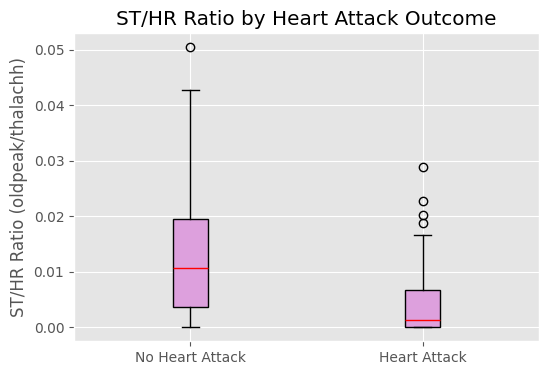

In [15]:
from scipy.stats import ttest_ind

# Compute ratio as oldpeak divided by thalachh
data['st_hr_ratio'] = data['oldpeak'] / data['thalachh']

ratio_yes = data[data['output']==1]['st_hr_ratio']
ratio_no = data[data['output']==0]['st_hr_ratio']

print('Mean ST/HR ratio (Heart Attack = 1):', ratio_yes.mean())
print('Mean ST/HR ratio (Heart Attack = 0):', ratio_no.mean())

stat, p = ttest_ind(ratio_yes, ratio_no, equal_var=False)
print(f'T-test statistic: {stat:.3f}, p-value: {p:.5f}')

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot([ratio_no, ratio_yes], labels=['No Heart Attack','Heart Attack'], patch_artist=True,
            boxprops=dict(facecolor='#DDA0DD'), medianprops=dict(color='red'))
plt.title('ST/HR Ratio by Heart Attack Outcome')
plt.ylabel('ST/HR Ratio (oldpeak/thalachh)')
plt.show()

## End!